In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import glob
import time
from collections import deque
from moviepy.editor import VideoFileClip
from helperfunctions import *
from svmclassifier import *
%matplotlib inline
print('Loaded')

Loaded


In [2]:
#pickle_image_folder('c://big/p5/vehicles')

In [3]:
# Read training data 
# Car
cars_files_png = glob.glob('C://big/p5/vehicles/**/*.png', recursive=True)
cars_files_jpg = glob.glob('C://big/p5/vehicles/**/*.jpg', recursive=True)
# Not Car
notcars_files = glob.glob('C://big/p5/non-vehicles/**/*.png', recursive=True)

# store filenames in cars,notcars
cars=[]
notcars=[]
# search through readed data 
# read every third image to split time-series of images
for n in range(len(cars_files_jpg)):
    if n % 2 == 0:
        cars.append(cars_files_jpg[n])
for n in range(len(cars_files_png)):
    if n % 2 == 0:
        cars.append(cars_files_png[n])
        
#print(cars)

# Do the same for non-car data
for n in range(len(notcars_files)):
    if n % 3 == 0:
        notcars.append(notcars_files[n])
        
print('Cars size is: ',np.shape(cars))
print('Not-Cars size is: ',np.shape(notcars))

Cars size is:  (4695,)
Not-Cars size is:  (2990,)


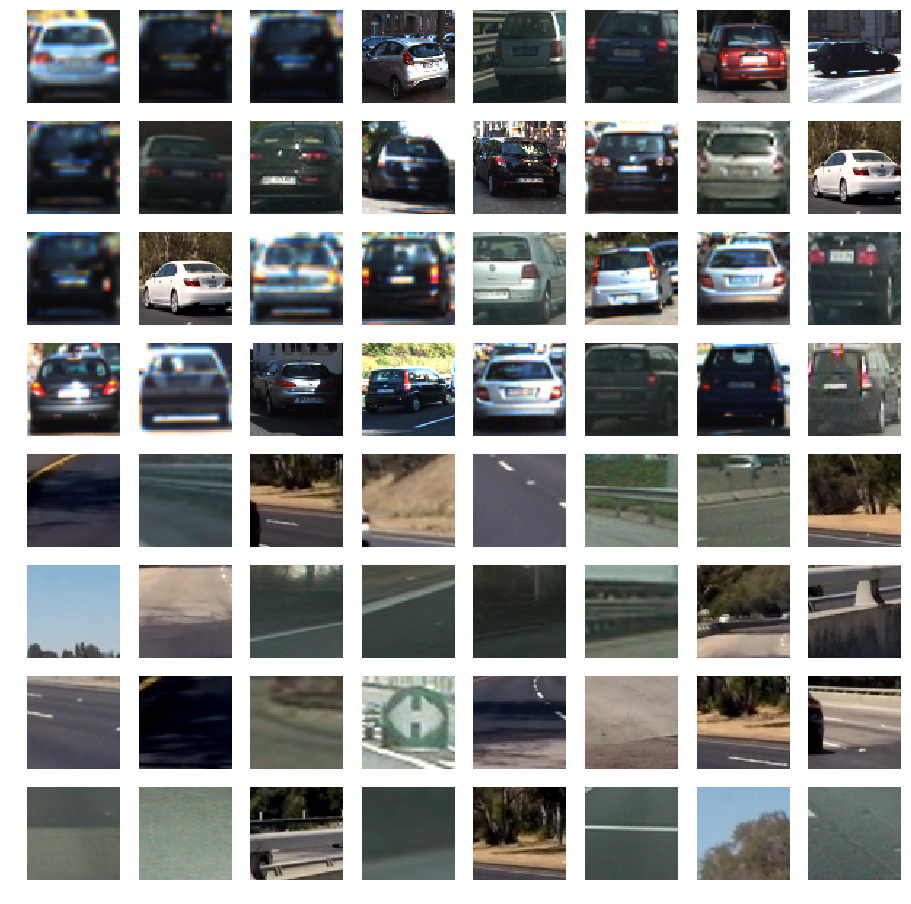

In [4]:
fig, axs = plt.subplots(8,8, figsize=(16, 16))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

# Step through the list and search for chessboard corners
for i in np.arange(32):
    img = cv2.imread(cars[np.random.randint(0,len(cars))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    #axs[i].set_title('Car', fontsize=10)
    axs[i].imshow(img)
for i in np.arange(32,64):
    img = cv2.imread(notcars[np.random.randint(0,len(notcars))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    #axs[i].set_title('Not Car', fontsize=10)
    axs[i].imshow(img)

In [5]:
folder = 'test'
(folder + '/**/*.png')

'test/**/*.png'

In [6]:
# Testing functions above - pickle_extracted_features()
cspace ='YCrCb'
orient = 9
pix_per_cell = 16
cell_per_block = 2
hog_channel = 'ALL'

# Extract the features, then save a pickle file
fname = 'X_scaler_scaled_X_y.p'
if os.path.isfile(fname) == False:
    print('Already Extracted, got my pickle')
    pass
else:
    pickle_extracted_features('X_scaler_scaled_X_y.p',cars,notcars,cspace,orient,
                          pix_per_cell,cell_per_block,hog_channel)

# Test training_with_SVM()
training_with_SVM('X_scaler_scaled_X_y.p')

pickle ext cspace is  YCrCb
extract feat cspace is YCrCb
extract feat cspace is YCrCb
 Seconds to extract features:  25.85
The input was: cspace = YCrCb, orient = 9,    pix_per_cell = 16, cell_per_block = 2
Extracted features are stored in pickled file:X_scaler_scaled_X_y.p
10.71 Seconds to train SVC
Test Accuracy of SVC =  0.9879
Model saved as [ svc.pickle ] file
My SVC predictions: 
 [ 0.  1.  0.  1.  0.  1.  1.  0.  1.  0.]
For  10 labels: 
 [ 0.  1.  0.  1.  0.  1.  1.  0.  1.  0.]


In [7]:
cars[1]

'C://big/p5/vehicles\\GTI_Far\\image0002.png'

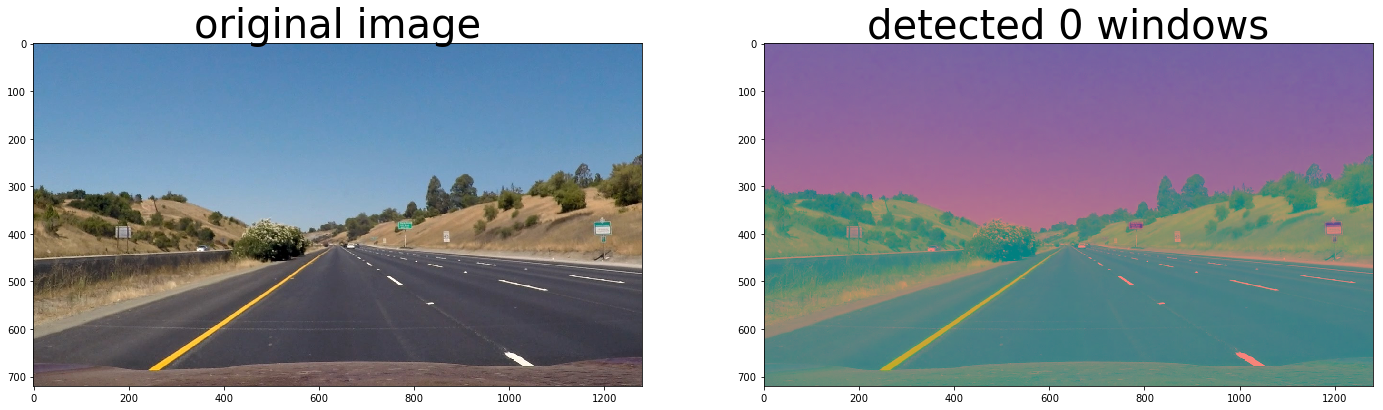

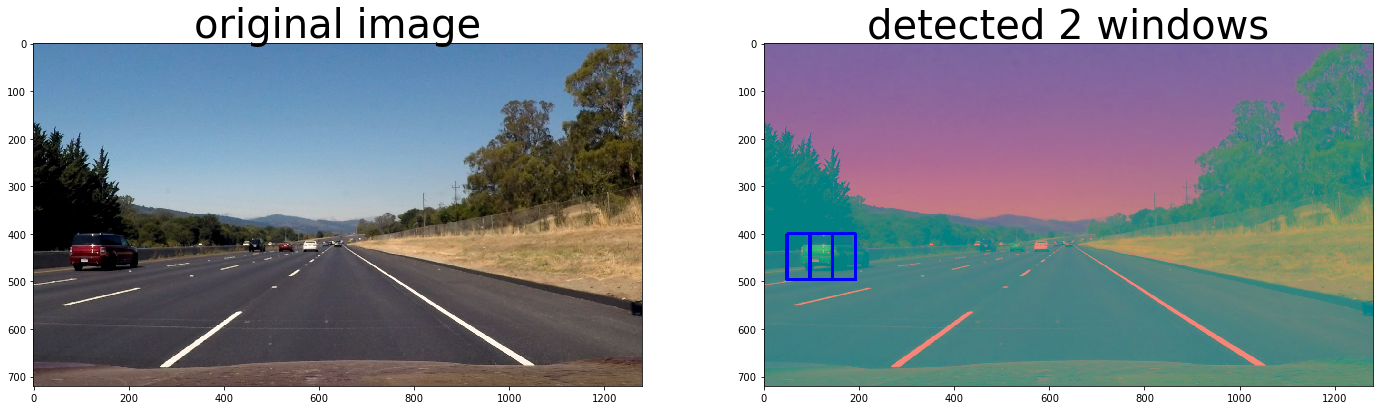

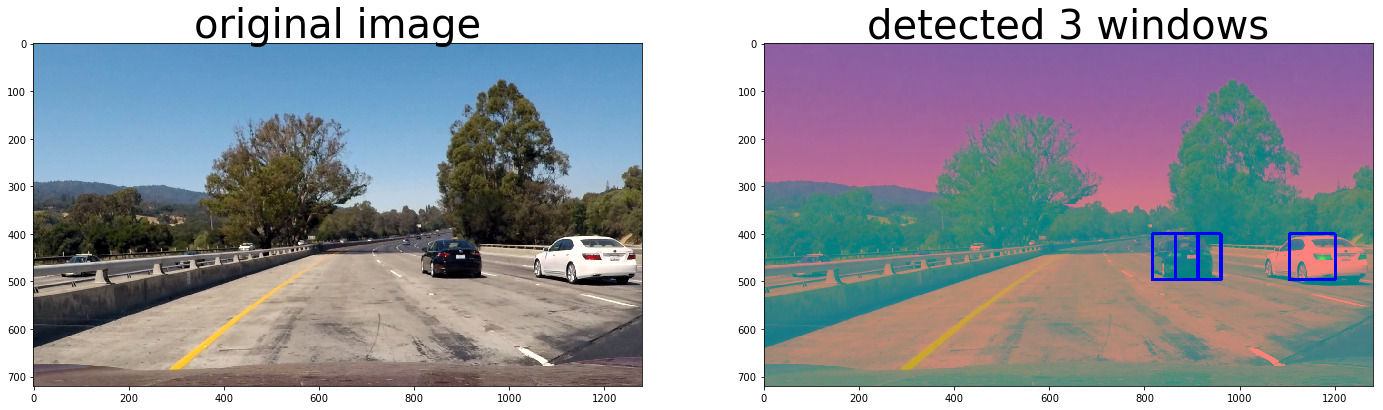

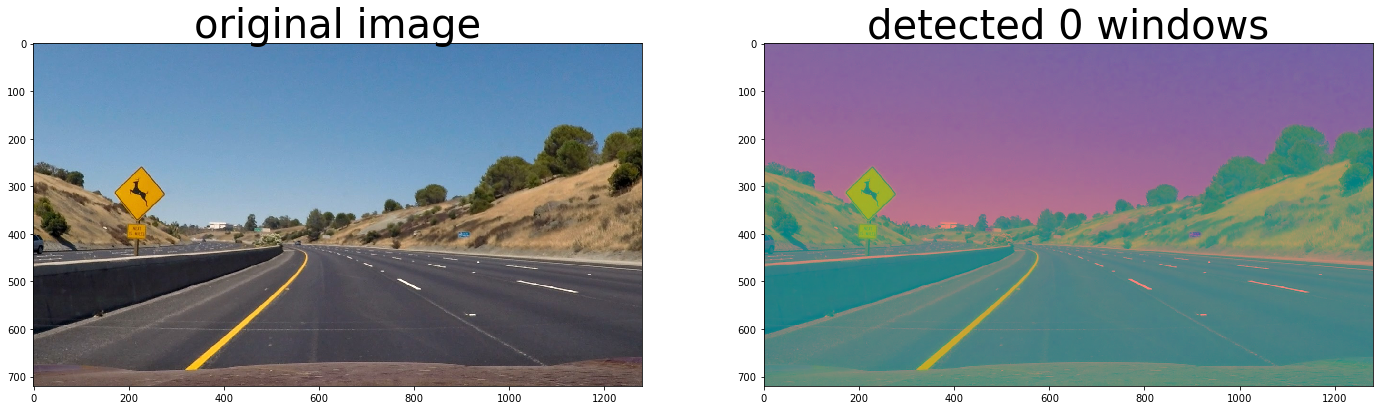

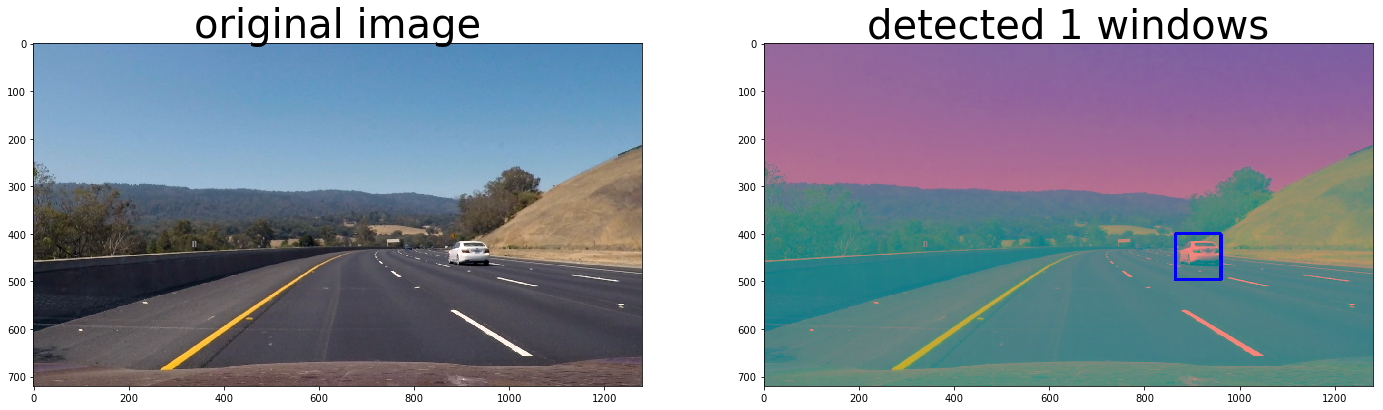

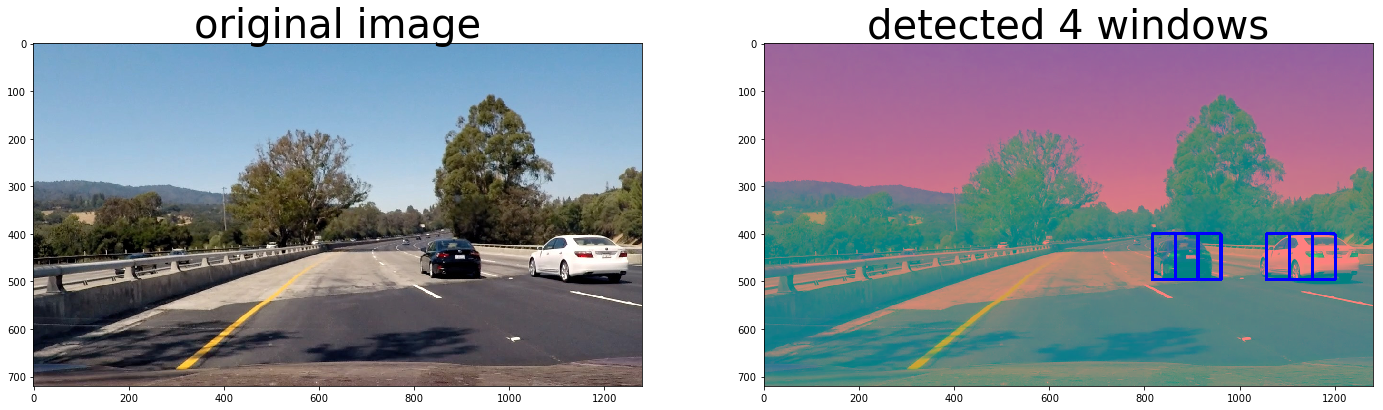

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


done
[((816, 400), (912, 496)), ((864, 400), (960, 496)), ((1056, 400), (1152, 496)), ((1104, 400), (1200, 496))]


In [8]:
# Pull in test Image
image = mpimg.imread('media/test_images/test3.jpg')

# Load the data and trained model weights
scaled_data = pickle.load(open(fname,'rb'))
svc = pickle.load(open('svc.pickle','rb'))    
X_scaler = scaled_data["X_scaler"]

ystart = 400
ystop = 700
scale = 1.5
spatial_size=(32,32)
hist_bins=32
orient=9  # Errors out if I change this number


input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        win,img = find_cars(image, ystart, ystop, scale, svc, X_scaler,cspace, orient, 
                            pix_per_cell, cell_per_block)

    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(image)
    ax1.set_title('original image', fontsize=40)
    ax2.imshow(img)
    ax2.set_title('detected '+ str(len(win)) + ' windows', fontsize=40)
    plt.show()
print("done")
print(win)



In [9]:
# test function above - find_cars
image = mpimg.imread('media/test_images/test3.jpg')

y_half = image.shape[0] // 2
y_end = image.shape[0] #- (y_half % 64)
ystart = [y_half,y_half+100]
ystop = [y_end-100, y_end]
scale = [1.6,2.2]
#ystart = [400]
#ystop = [700]
#scale = [1.5]
point_scale_data = np.vstack((ystart,ystop,scale))
print(point_scale_data)
windows = search_with_multiscale_windows(image, cspace, orient, pix_per_cell, cell_per_block, 
                                         point_scale_data)


print(windows)
print(len(windows))

[[ 360.   460. ]
 [ 620.   720. ]
 [   1.6    2.2]]
[((870, 411), (972, 513))]
1


In [10]:
test_img = mpimg.imread('media/test_images/test1.jpg')

rects = []

ystart = 400
ystop = 464
scale = 1.0
rects.append(find_cars(test_img, ystart, ystop, scale, colorspace, hog_channel, svc, None, 
                       orient, pix_per_cell, cell_per_block, None, None, show_all_rectangles=True))
ystart = 416
ystop = 480
scale = 1.0
rects.append(find_cars(test_img, ystart, ystop, scale, colorspace, hog_channel, svc, None, 
                       orient, pix_per_cell, cell_per_block, None, None, show_all_rectangles=True))

rectangles = [item for sublist in rects for item in sublist] 
test_img_rects = draw_boxes(test_img, rectangles, color='random', thick=2)
plt.figure(figsize=(10,10))
plt.imshow(test_img_rects)
print('Number of boxes: ', len(rectangles))

NameError: name 'colorspace' is not defined

In [ ]:
def draw_labeled_windows(img, labels):
    # Iterate through all detected cars
    for car_num in range(1, labels[1]+1):
        # Find pixels with each car_num label value
        nonzero = (labels[0] == car_num).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        win = ((np.min(nonzerox),np.min(nonzeroy)),(np.max(nonzerox),np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, win[0], win[1], (255,0,0), 6)

    # Return image
    return img


def test_image(image,cspace,orient,pix_per_cell,cell_per_block,point_scale_data):
    img = np.copy(image)
    windows = search_with_multiscale_windows(image, cspace, orient, pix_per_cell, 
                                             cell_per_block,point_scale_data)
    
    if len(windows) > 0:
        heat = np.zeros_like(image[:,:,0]).astype(np.float)
        heat = add_heat(heat, windows)
        # Lower value increases likelyhood of drawing box
        heat = apply_threshold(heat,1)
        heatmap = np.clip(heat, 0, 255)
        labels = label(heatmap)
        draw_img = draw_labeled_windows(img, labels)
    else:
        print("No windows found")
        draw_img = image
        heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
        
    return draw_img,heatmap


def search_with_multiscale_windows(img, cspace, orient, pix_per_cell, cell_per_block, 
                                   point_scale_data, spatial_size=(32,32), hist_bins=32):
    #print('search_with_multiscale cspace is ',cspace)

    # Define array to store recent windows
    windows = []
    origin = np.copy(img)
    svc = pickle.load(open('svc.pickle','rb'))
    
    scal_data = pickle.load(open('X_scaler_scaled_X_y.p','rb'))
    X_scaler = scal_data["X_scaler"]
    
    ystart=point_scale_data[0]
    ystop=point_scale_data[1]
    scale=point_scale_data[2]
    #print(ystart,ystop,scale)
    
    for y_start,y_end, scales in zip(ystart,ystop,scale):
        win_list, draw_img = find_cars(img, int(y_start), int(y_end), scales, svc, 
                                       X_scaler, cspace,orient,pix_per_cell, cell_per_block)
        
        windows = windows + win_list
    
    return windows




# test multiscale window search and heatmap
cspace = "YCrCb"
input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        # When moving function to outside script, had to pass all the arguments
        # Not sure what side effects this caused
        img,heat = test_image(image,cspace,orient,pix_per_cell,cell_per_block,point_scale_data)

    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(img)
    ax1.set_title('detected windows', fontsize=40)
    ax2.imshow(heat, cmap='hot')
    ax2.set_title('heatmap', fontsize=40)
    plt.show()
print("done")



In [ ]:

iteration = 1

# keep current heatmaps
heatmaps = deque(maxlen=15)
def process_video(image):
    cimg = np.copy(image)
    windows = search_with_multiscale_windows(image, cspace, orient, pix_per_cell, cell_per_block,
                                             point_scale_data)
    iteration = 1
    #print("iterations: ",iteration)
    #global iteration, heatmaps
    if len(windows) > 0:
        heat = np.zeros_like(image[:,:,0]).astype(np.float)
        heat = add_heat(heat, windows)
        heatmaps.append(heat)
        #print(len(heatmaps))
        # take recent 10 heatmaps and average them
        if len(heatmaps) == 3:
            avg_heat = sum(heatmaps)/len(heatmaps)
            heat = avg_heat
        heat = apply_threshold(heat,1)
        heatmap = np.clip(heat, 0, 255)
        #heatmaps.append(heatmap)
        #if iteration % 10 == 0:
        #    heatmap = avg_heatmaps
        labels = label(heatmap)
        draw_img = draw_labeled_windows(cimg, labels)
    else:
        # pass the image itself if nothing was detected
        draw_img = cimg
    iteration += 1
    return draw_img

# test on short video
output_name = 'testing_video_thresh_v2.mp4'
#clip0 = VideoFileClip("media/project_video.mp4")
clip0 = VideoFileClip("media/project_video.mp4").subclip(15,31)
clipping = clip0.fl_image(process_video)
%time clipping.write_videofile(output_name, audio=False)